Analysis on Categories of Books and Most Popular Books

In [1]:
import os
import csv
import json
import datetime
import dateutil.parser as parser
import matplotlib.pyplot as plt
import pylab

In [2]:
loc=r'C:\Users\ishac\Midterm\Question2'
books_loc=os.path.join(loc,'Books')
articles_loc=os.path.join(loc,'Articles')

In [36]:
#Articles Published in a certain category
tempart=[]
results=0
index=0
for direct, subdir, files in os.walk(articles_loc):
    for file in files:
        with open(os.path.join(direct,file),'r',encoding='utf-8',errors='ignore') as json_input:
                tempart.append(json.load(json_input))

In [4]:
#Books Published in a certain category
temp=[]
results=0
index=0
for direct, subdir, files in os.walk(books_loc):
    for file in files:
        with open(os.path.join(direct,file),'r',encoding='utf-8',errors='ignore') as json_input:
                 temp.append(json.load(json_input))
                           
                        

In [5]:
Index=0
with open('NewCategoryBooks.csv','w') as csvfile:
    writer = csv.writer(csvfile)  
    writer.writerow(['Index','Category','NumberofBooksPublished'])
    for i in range(len(temp)):
            Index=Index+1
            if temp[i][0]['results'][i]['list_name'] not in "NewCategoryBooks.csv":
                writer.writerow([Index,temp[i][0]['results'][i]['list_name'],temp[i][0]['num_results']])
    

In [6]:
#books published in a year
date=[]
for i in range(len(temp)):
    for j in range(0,temp[i][0]['num_results']):
        date.append(parser.parse(temp[i][0]['results'][j]['published_date']).year)
        #print(date)
        diDate={}
        for d in date:
            if d in diDate:
                diDate[d]=diDate[d]+1
            else:
                diDate[d]=1           

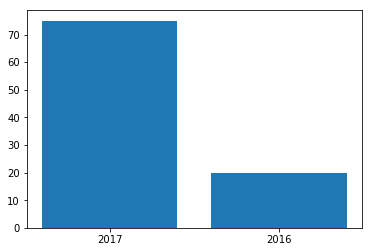

In [7]:
plt.bar(range(len(diDate)), diDate.values(), align='center')
plt.xticks(range(len(diDate)), list(diDate.keys()))
plt.show()

In [8]:
#articles published in a year
dateart=[]
for i in range(len(tempart)):
    for j in range(0,tempart[i][0]['num_results']):
        dateart.append(parser.parse(tempart[i][0]['results'][i]['published_date']).year)
        #print(date)
        diDateArt={}
        for d in dateart:
            if d in diDateArt:
                diDateArt[d]=diDateArt[d]+1
            else:
                diDateArt[d]=1 

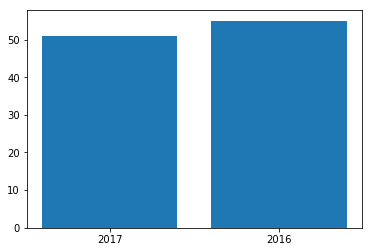

In [9]:
plt.bar(range(len(diDateArt)), diDateArt.values(), align='center')
plt.xticks(range(len(diDateArt)), list(diDateArt.keys()))
plt.show()

In [10]:
#books and articles published in a year
masterdate=date+dateart
di={}
for d in masterdate:
    if d in di:
        di[d]=di[d]+1
    else:
        di[d]=1

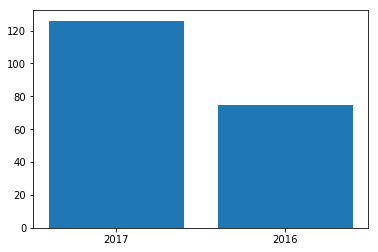

In [11]:
plt.bar(range(len(di)), di.values(), align='center')
plt.xticks(range(len(di)), list(di.keys()))
plt.show()

In [12]:
#Books in a year in a certain category
for i in range(len(temp)):
    for j in range(0,temp[i][0]['num_results']):
        category=temp[i][0]['results'][j]['list_name']
        #print(category)

In [13]:
Index=0
with open('CategoricalBookYear.csv','w') as csvfile:
    writer = csv.writer(csvfile)  
    writer.writerow(['Index','Category','PublishedYear','PublishedMonth','Total'])
    for i in range(len(temp)):
        Index+=1
        writer.writerow([Index,temp[i][0]['results'][i]['list_name'],parser.parse(temp[i][0]['results'][i]['published_date']).year,parser.parse(temp[i][0]['results'][i]['published_date']).month,
                        temp[i][0]['num_results']])

In [37]:
Index=0
with open('CategoricalArticleYear.csv','w') as csvfile:
    writer = csv.writer(csvfile)  
    writer.writerow(['Index','Category','PublishedYear','PublishedMonth','Total'])
    for i in range(len(tempart)):
        for j in range(len('results')):
                Index+=1
                writer.writerow([Index,tempart[i][0]['results'][j]['column'],parser.parse(tempart[i][0]['results'][j]['published_date']).year,parser.parse(tempart[i][0]['results'][j]['published_date']).month,
                        tempart[i][0]['num_results']])

In [15]:
Index=0
cat=input("Enter a Category?(Harcover fiction,Hardcover Nonfiction,Travel,Sports,Education)")
for i in range(len(temp)):
    if temp[i][0]['results'][i]['list_name'] == cat:
        with open('BookList.csv','w') as csvfile:
            writer = csv.writer(csvfile)  
            writer.writerow(['Index','Category','BookName','Publisher','Contributor','PublishedDate','BestSellersDate','url'])
            for i in range(len(temp)):
                #for j in range(0,temp[i][0]['num_results']):
                    Index+=1
                    writer.writerow([Index,cat,temp[i][0]['results'][i]['book_details'][0]['title'],
                                temp[i][0]['results'][i]['book_details'][0]['publisher'],
                                temp[i][0]['results'][i]['book_details'][0]['contributor'],
                                temp[i][0]['results'][i]['published_date'],
                                temp[i][0]['results'][i]['bestsellers_date'],
                                temp[i][0]['results'][i]['amazon_product_url']])    

Enter a Category?(Harcover fiction,Hardcover Nonfiction,Travel,Sports,Education)Sports


In [38]:
Index=0
art=input("Enter a Category(Help Desk,Nonfiction,Books News,Recommended Reads,Further Reading,Bookends)?")
for i in range(len(tempart)):
    for j in range(len('results')):
        if tempart[i][0]['results'][j]['column'] == art:
            with open('ArtList.csv','w') as csvfile:
                writer = csv.writer(csvfile)  
                writer.writerow(['Index','Category','ArticleTitle','Publisher','Contributor','PublishedDate','BestSellersDate','url'])
                for i in range(len(tempart)):
                     for j in range(len('results')):
                        Index+=1
                        writer.writerow([Index,art,tempart[i][0]['results'][j]['title'],
                                        tempart[i][0]['results'][j]['byline'],
                                        tempart[i][0]['results'][j]['source'],
                                        tempart[i][0]['results'][j]['published_date'],
                                        'none',tempart[i][0]['results'][j]['url']])
                        

Enter a Category(Help Desk,Nonfiction,Books News,Recommended Reads,Further Reading,Bookends)?Nonfiction
